In [1]:
import numpy as np
import pandas as pd

#### Используем классический датасет классификации ирисов. В нем содержатся измерения параметров чашелистиков и лепестков для различных подвидов ирисов. Рисуем диаграмму рассеяния (Scatterplot) в координатах "Длина чашелистика" / "Длина лепестка", цвет маркера показывает вид ириса.

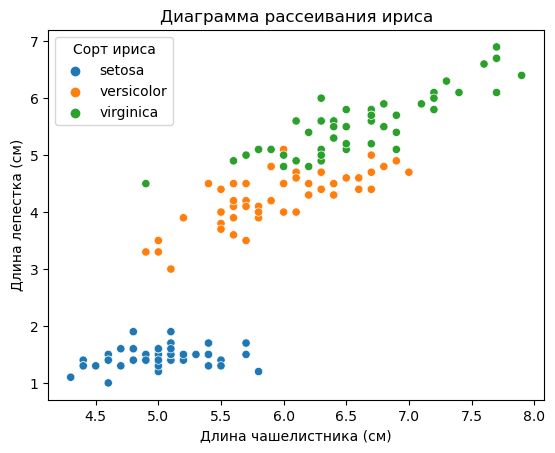

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from pandas import DataFrame


Iris = datasets.load_iris()
Iris_df = DataFrame(Iris.data)
Iris_df.columns = Iris.feature_names
Iris_df['target'] = Iris.target
Iris_df['class'] = Iris_df.target.apply(lambda x : Iris.target_names[x])

# Iris_df.head()

sns.scatterplot(data=Iris_df, x= "sepal length (cm)", y = "petal length (cm)", hue="class")
plt.xlabel('Длина чашелистника (см)')
plt.ylabel('Длина лепестка (см)')
plt.title('Диаграмма рассеивания ириса')
plt.legend(title='Сорт ириса')

plt.show()

#### Решаем задачу классификации подвидов ирисов с помощью деревьев решений.
#### Делим датасет на обучающую и тестовую, с параметрами `test_size=0.2`, `random_state=42`
#### Используя признаки "Длина чашелистика" и "Длина лепестка", обучаем дерево решений с глубиной дерева 2.
#### Считаем точность (accuracy) классификации.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Iris_df[['sepal length (cm)', 'petal length (cm)']], 
        Iris_df['target'], test_size = 0.2, random_state= 42)

Class = DecisionTreeClassifier(max_depth=2)
Class.fit(X_train, y_train)
 
print("Правильность на тестовом наборе: {:.3f}".format(Class.score(X_test, y_test)))

Правильность на тестовом наборе: 0.967


#### Строим разделяющую поверхность по признакам "Длина чашелистика" и "Длина лепестка". 
#### Отрисовываем дерево, которое получилось в результате обучения модели. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import tree

def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


def plot_decision_surface(
        model, train_data, train_labels, test_data, test_labels,
        colors=ListedColormap(['red', 'blue', 'yellow']),
        light_colors=ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
):
    train_data = train_data.to_numpy()
    test_data = test_data.to_numpy()
    # set figure size
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

    # plot decision surface on the train data
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    plt.title('Train data, accuracy={:.2f}'.format(accuracy_score(train_labels, model.predict(train_data))))

    # plot decision surface on the test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    plt.title('Test data, accuracy={:.2f}'.format(accuracy_score(test_labels, model.predict(test_data))))


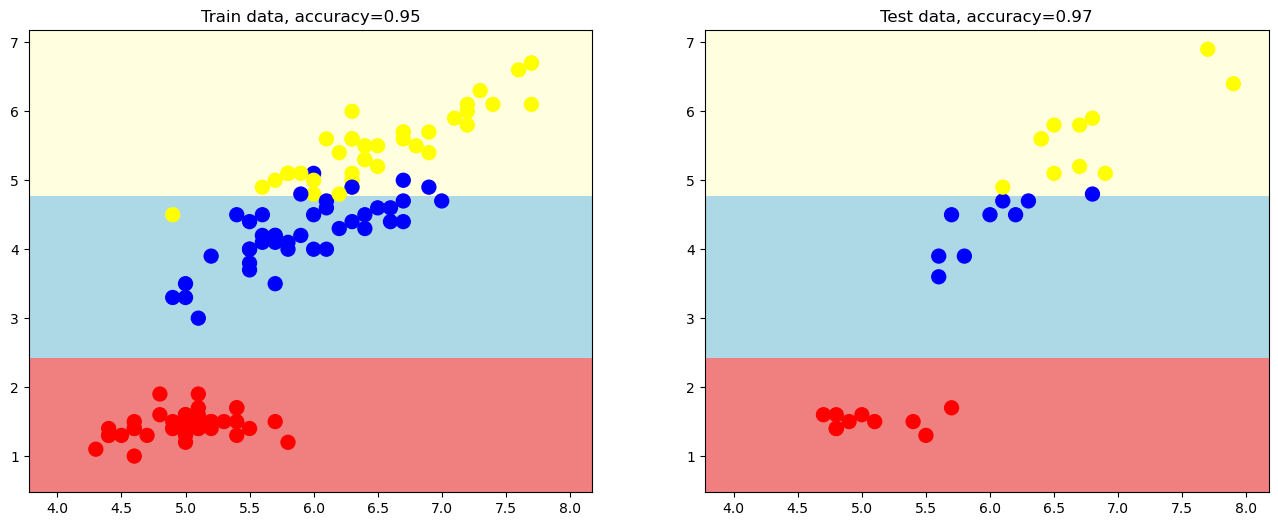

In [5]:
Class = tree.DecisionTreeClassifier(max_depth=2)
Class.fit(X_train.values, y_train)
plot_decision_surface(Class, X_train, y_train, X_test, y_test)

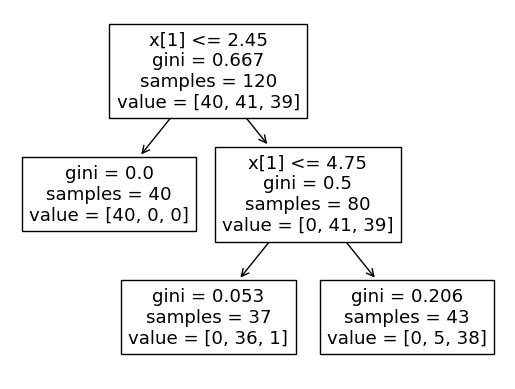

In [6]:
tree.plot_tree(Class);

#### Решаем задачу регрессии с помощью деревьев решений
#### Генерируем синусоидальный сигнал с небольшими шумами размером 1000 отсчетов. 
#### Делим датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`.
#### Обучаем дерево решений для предсказания синусоидального сигнала c глубиной дерева 1. 
#### Строим график истинных ответов и предсказаний модели.

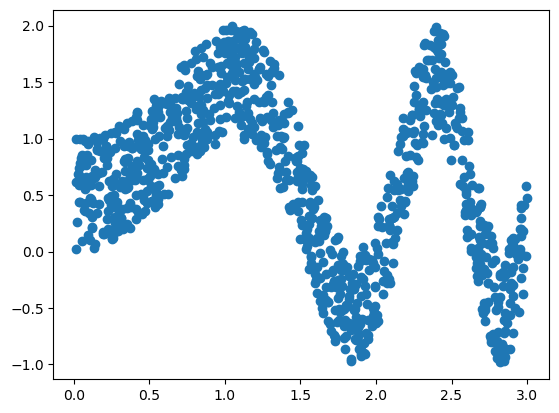

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor


def generate_sin(sample_size, n=1):
    np.random.seed(42)
    X = np.random.random((sample_size, n))*3
    coeffs = 1 + 2 * np.random.random((n, 1))
    y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((sample_size, 1))
    return X, y

X, y = generate_sin(1000)
plt.scatter(X,y);

In [8]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

Reg = tree.DecisionTreeRegressor(max_depth = 1)
Reg = Reg.fit(X_train, y_train)

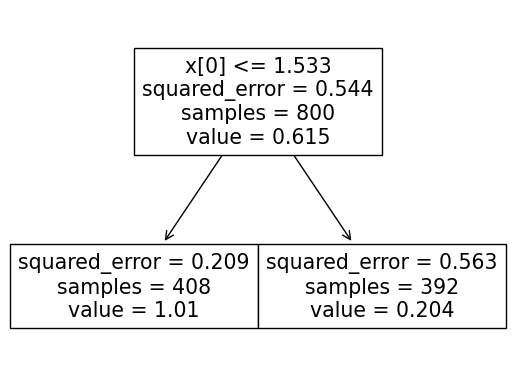

In [9]:
tree.plot_tree(Reg);

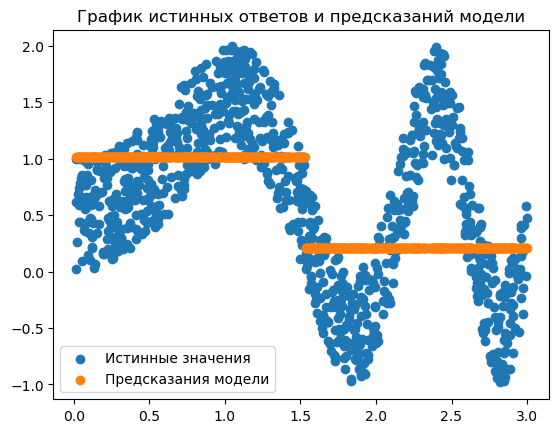

In [10]:
plt.scatter(X,y, label = 'Истинные значения')
plt.scatter(X_train, Reg.predict(X_train), label = 'Предсказания модели')
plt.legend()
plt.title ('График истинных ответов и предсказаний модели')
plt.show()

#### Пробуем менять грубину дерева в дереве решений для предсказания синуса.
#### Построим график зависимости среднеквадратичной ошибки (MSE) предсказания на тестовой выборке от глубины дерева (от 1 до 30). 
#### Напишем при какой глубине дерева, качество модели наилучшее. 

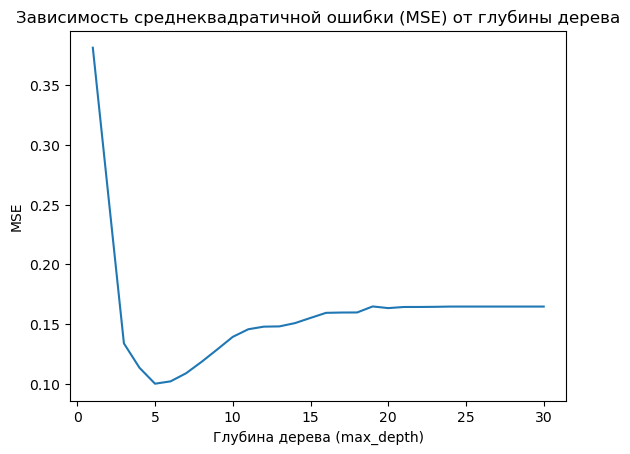

Качество модели наилучшее, при max_depth: 5


In [11]:
from sklearn.metrics import mean_squared_error

mse_scores = [] 
for i in range(1, 31):
    tree = DecisionTreeRegressor(max_depth = i)
    
    tree.fit(X_train, y_train)
    
    y_pred = tree.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    
    mse_scores.append(mse)
    
plt.plot(range(1,31), mse_scores)
plt.xlabel('Глубина дерева (max_depth)')
plt.ylabel('MSE')
plt.title('Зависимость среднеквадратичной ошибки (MSE) от глубины дерева')
plt.show()

print('Качество модели наилучшее, при max_depth:', np.argmin(mse_scores)+1)

Глубина дерева, на котором MSE на тестовой выборке наилучший: 5

#### Знакомимися с методом bootstrap. Воспользуемся `BaggingRegressor` из `sklearn.ensemble` для того, чтобы обучить сразу несколько деревьев решений c параметром `max_depth=5`.
#### Рассчитаем среднеквадратичную ошибку (MSE) предсказания на тестовой выборке. Построим график зависимости MSE от **количества базовых моделей** в `BaggingRegressor` с параметрами `bootstrap=True, random_state=42` (от 1 до 50). 
#### Напишем количество деревьев, при котором качество модели наилучшее. 

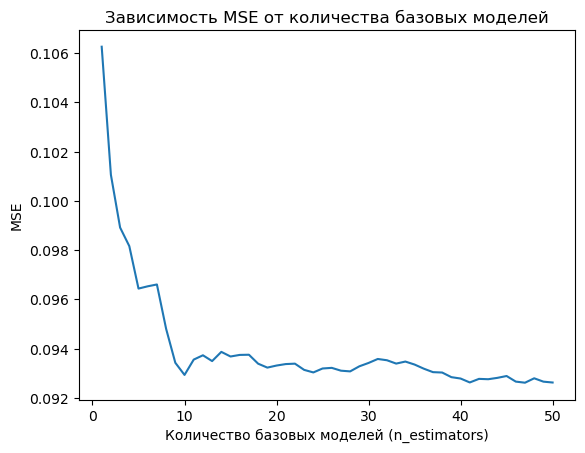

Качество модели наилучшее, при количестве деревьев: 47


In [12]:
from sklearn.ensemble import BaggingRegressor

mse_scores = []

for n_estimators in range (1, 51):
    bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth = 5), 
                                         n_estimators=n_estimators, 
                                         bootstrap=True,
                                         random_state= 42)
   
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    bagging_regressor.fit(X_train, y_train)
    y_pred = bagging_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
plt.plot(range(1,51), mse_scores)
plt.xlabel('Количество базовых моделей (n_estimators)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества базовых моделей')
plt.show()

print('Качество модели наилучшее, при количестве деревьев:', mse_scores.index(min(mse_scores))+1)

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 47

#### Познакомимся с алгоритмом случайного леса (Random Forest). Обучим алгоритм случайного леса с параметрами max_depth=5, n_estimators=100, max_features=1, random_state=42.
#### Посчитаем MSE на тестовой выборке.

In [13]:
from sklearn.ensemble import RandomForestRegressor

RandomForest = RandomForestRegressor(max_depth=5,  n_estimators=100, max_features=1, random_state=42)

RandomForest.fit(X_train, y_train.ravel())
y_pred = RandomForest.predict(X_test)

mse = mean_squared_error(y_test.ravel(), y_pred)

print('MSE на тестовой выборке:', round(mse,3))

MSE на тестовой выборке: 0.091
